**Import statements**


In [1]:
import pandas as pd
from datetime import datetime
from datetime import timedelta
import numpy as np
import pykrige.kriging_tools as kt
from pykrige.ok import OrdinaryKriging
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

import constants
import functions

%matplotlib inline

**Load Data**

In [2]:
all_static_data = functions.load_static_sensors()
all_static_data = functions.transform_to_grid_coordinates(all_static_data)
mobile_sensor_data = functions.load_mobile_sensors()
mobile_sensor_data = functions.transform_to_grid_coordinates(mobile_sensor_data)

**Compute predictions for stationary sensors**

In [3]:
par_grid = functions.create_par()
start_time = '2018-07-03 00:00:00'
end_time = '2018-07-03 13:45:00'
window = 15
timeint, par_grid = functions.train(all_static_data, mobile_sensor_data, start_time, end_time, par_grid, window)
print (timeint)

54


In [4]:
mae = []
mse = []
squares = []

start_window = '2018-07-03 13:45:00'
end_window = '2018-07-03 14:00:00'
offset_timeint = 1
number_of_windows = 6
window = 15
start_time = '2018-07-03 00:00:00'
par_grid = functions.create_par()
timeint_on_first_window = 0
for i in range(1, number_of_windows+1):
    end_time = start_window
    timeint, par_grid = functions.train(all_static_data, mobile_sensor_data, start_time, end_time, par_grid, window, timeint_on_first_window, verbose = True)
    to_test = functions.test_mobile(par_grid, timeint, mobile_sensor_data, start_window, end_window, i)
    squares.append(to_test.shape[0])
    mae.append(mean_absolute_error(to_test['PM2.5'], to_test['pred_PM2.5']))
    mse.append(mean_squared_error(to_test['PM2.5'], to_test['pred_PM2.5']))
    start_time = end_time
    start_window = (datetime.strptime(start_window, '%Y-%m-%d %H:%M:%S') + timedelta(minutes=15)).strftime("%Y-%m-%d %H:%M:%S")
    end_window = (datetime.strptime(end_window, '%Y-%m-%d %H:%M:%S') + timedelta(minutes=15)).strftime("%Y-%m-%d %H:%M:%S")
    timeint_on_first_window = timeint+1
    

Inside while loop with timeint = 0
start_window = 2018-07-03 00:00:00
end_window = 2018-07-03 00:15:00
Inside while loop with timeint = 1
start_window = 2018-07-03 00:15:00
end_window = 2018-07-03 00:30:00
Inside while loop with timeint = 2
start_window = 2018-07-03 00:30:00
end_window = 2018-07-03 00:45:00
Inside while loop with timeint = 3
start_window = 2018-07-03 00:45:00
end_window = 2018-07-03 01:00:00
Inside while loop with timeint = 4
start_window = 2018-07-03 01:00:00
end_window = 2018-07-03 01:15:00
Inside while loop with timeint = 5
start_window = 2018-07-03 01:15:00
end_window = 2018-07-03 01:30:00
Inside while loop with timeint = 6
start_window = 2018-07-03 01:30:00
end_window = 2018-07-03 01:45:00
Inside while loop with timeint = 7
start_window = 2018-07-03 01:45:00
end_window = 2018-07-03 02:00:00
Inside while loop with timeint = 8
start_window = 2018-07-03 02:00:00
end_window = 2018-07-03 02:15:00
Inside while loop with timeint = 9
start_window = 2018-07-03 02:15:00
end

In [6]:
mae

[2.378931985811072,
 7.372120951356723,
 0.5128049078682898,
 0.992379810646798,
 0.5066701984215534,
 2.7995319832931]

In [7]:
mae_no_online = []
mse_no_online = []
squares_no_online = []

start_window = '2018-07-03 13:45:00'
end_window = '2018-07-03 14:00:00'
offset_timeint = 1
number_of_windows = 6
par_grid = functions.create_par()
start_time = '2018-07-03 00:00:00'
end_time = start_window
timeint, par_grid = functions.train(all_static_data, mobile_sensor_data, start_time, end_time, par_grid, window)


for i in range(1, number_of_windows+1):
    to_test = functions.test_mobile(par_grid, timeint, mobile_sensor_data, start_window, end_window, i)
    squares_no_online.append(to_test.shape[0])
    mae_no_online.append(mean_absolute_error(to_test['PM2.5'], to_test['pred_PM2.5']))
    mse_no_online.append(mean_squared_error(to_test['PM2.5'], to_test['pred_PM2.5']))
    start_window = (datetime.strptime(start_window, '%Y-%m-%d %H:%M:%S') + timedelta(minutes=15)).strftime("%Y-%m-%d %H:%M:%S")
    end_window = (datetime.strptime(end_window, '%Y-%m-%d %H:%M:%S') + timedelta(minutes=15)).strftime("%Y-%m-%d %H:%M:%S")

In [8]:
mae_no_online

[2.378931985811072,
 1.4743843975362683,
 0.6358325967073964,
 0.5191209202615743,
 0.2781495208843021,
 0.8354529830195766]

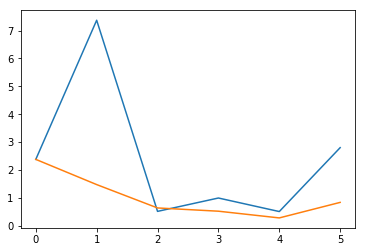

In [9]:
plt.plot(mae)
plt.plot(mae_no_online)